In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
from torch import nn
from torch import optim
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, models
from torch.autograd import Variable
import torch.utils.data as data
import pandas as pd
import os
from PIL import Image
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import ImageFolder

In [3]:
DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(DEVICE)

cuda


In [4]:
# paths for (labeled) training & validation data.
train_path = '/content/drive/MyDrive/FashionClassification/Train/'
valid_path = '/content/drive/MyDrive/FashionClassification/Validation/'
aug_path = '/content/drive/MyDrive/FashionClassification/Aug/'

In [ ]:
#이미 데이터 늘린 코드라 안돌려도돼!
# import random
# import os
# import cv2
# import glob
# from PIL import Image
# import PIL.ImageOps    

# #다음 변수를 수정하여 새로 만들 이미지 갯수를 정합니다.
# num_augmented_images = 100

# file_path1 = '/content/drive/MyDrive/FashionClassification/Train/Sporty'
# file_path2 = '/content/drive/MyDrive/FashionClassification/Train/Retro'
# file_path3 = '/content/drive/MyDrive/FashionClassification/Train/Resort'
# file_names1 = os.listdir(file_path1)
# file_names2 = os.listdir(file_path2)
# file_names3 = os.listdir(file_path3)

# save_path1 = '/content/drive/MyDrive/FashionClassification/Aug/Sporty/'
# save_path2 = '/content/drive/MyDrive/FashionClassification/Aug/Retro/'
# save_path3 = '/content/drive/MyDrive/FashionClassification/Aug/Resort/'
# total_origin_image_num = len(file_names1)
# augment_cnt = 1

# for i in range(1, num_augmented_images):
#     change_picture_index = random.randrange(1, total_origin_image_num-1)
#     print(change_picture_index)
#     #print(file_names[change_picture_index])
#     file_name1 = file_names1[change_picture_index]
#     file_name2 = file_names2[change_picture_index]
#     file_name3 = file_names3[change_picture_index]

#     origin_image_path1 = file_path1 +'/'+ file_name1
#     origin_image_path2 = file_path2 + '/'+file_name2
#     origin_image_path3 = file_path3 + '/'+file_name3

#     #print(origin_image_path)
#     image1 = Image.open(origin_image_path1)
#     image2 = Image.open(origin_image_path2)
#     image3 = Image.open(origin_image_path3)

#     random_augment = random.randrange(1,3)
    
#     if(random_augment == 1):
#         #이미지 좌우 반전
#         print("invert")
#         inverted_image1 = image1.transpose(Image.FLIP_LEFT_RIGHT)
#         inverted_image2 = image2.transpose(Image.FLIP_LEFT_RIGHT)
#         inverted_image3 = image3.transpose(Image.FLIP_LEFT_RIGHT)

#         inverted_image1.save(save_path1 + 'inverted_' + str(augment_cnt) + '.png')
#         inverted_image2.save(save_path2 + 'inverted_' + str(augment_cnt) + '.png')
#         inverted_image3.save(save_path3 + 'inverted_' + str(augment_cnt) + '.png')

#     elif(random_augment == 2):
#         #이미지 기울이기
#         print("rotate")
#         rotated_image1 = image1.rotate(random.randrange(-30, 30))
#         rotated_image2 = image2.rotate(random.randrange(-30, 30))
#         rotated_image3 = image3.rotate(random.randrange(-30, 30))

#         rotated_image1.save(save_path1 + 'rotated_' + str(augment_cnt) + '.png')
#         rotated_image2.save(save_path2 + 'rotated_' + str(augment_cnt) + '.png')
#         rotated_image3.save(save_path3 + 'rotated_' + str(augment_cnt) + '.png')
        
#     # elif(random_augment == 3):
#     #     #노이즈 추가하기
#     #     img1 = cv2.imread(origin_image_path1)
#     #     img2 = cv2.imread(origin_image_path2)
#     #     img3 = cv2.imread(origin_image_path3)

#     #     print("noise")
#     #     row1,col1,ch1= img1.shape
#     #     row2,col2,ch2= img2.shape
#     #     row3,col3,ch3= img3.shape

#     #     mean = 0
#     #     var = 0.1
#     #     sigma = var**0.5
#     #     gauss1 = np.random.normal(mean,sigma,(row1,col1,ch1))
#     #     gauss2 = np.random.normal(mean,sigma,(row2,col2,ch2))
#     #     gauss3 = np.random.normal(mean,sigma,(row3,col3,ch3))

#     #     gauss1 = gauss1.reshape(row1,col1,ch1)
#     #     gauss2 = gauss2.reshape(row2,col2,ch2)
#     #     gauss3 = gauss3.reshape(row3,col3,ch3)

#     #     noisy_array1 = img1 + gauss1
#     #     noisy_array2 = img2 + gauss2
#     #     noisy_array3 = img3 + gauss3

#     #     noisy_image1 = Image.fromarray(np.uint8(noisy_array1)).convert('RGB')
#     #     noisy_image2 = Image.fromarray(np.uint8(noisy_array2)).convert('RGB')
#     #     noisy_image3 = Image.fromarray(np.uint8(noisy_array3)).convert('RGB')

#     #     noisy_image1.save(save_path1 + 'noiseAdded_' + str(augment_cnt) + '.png')
#     #     noisy_image2.save(save_path2 + 'noiseAdded_' + str(augment_cnt) + '.png')
#     #     noisy_image3.save(save_path3 + 'noiseAdded_' + str(augment_cnt) + '.png')

#     augment_cnt += 1
    

In [5]:
# prepare training data set
classes = ['Resort', 'Retro', 'Sporty']

data =[]
label =[]

## i : Integer representation for each classes (Resort/Retro/Sporty -> 0/1/2)
for i, d in enumerate(classes):
    files = os.listdir(train_path+'/'+d)
    
    for f in files:
        img = Image.open(train_path+'/'+d+'/'+f,'r')
        img = img.resize((227, 227)) #(150,150)
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1))  # (150,150,3) --> (3,150,150)
        label.append(i)

for i, d in enumerate(classes):
    files = os.listdir(aug_path+'/'+d)
    
    for f in files:
        img = Image.open(aug_path+'/'+d+'/'+f,'r')
        img = img.resize((227, 227)) #(150,150)
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1))  # (150,150,3) --> (3,150,150)
        label.append(i)     
        
data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

train_X = torch.from_numpy(data) #numpy to tensor
train_Y = torch.from_numpy(label)

train_X = train_X.type(torch.cuda.FloatTensor) #32bit
train_Y = train_Y.type(torch.cuda.LongTensor) #For CrossEntropy Loss

train_dataset = TensorDataset(train_X,train_Y)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [6]:
data.shape, label.shape  # check

((7497, 3, 227, 227), (7497,))

In [7]:
# prepare validation data set
data =[]
label =[]

for i, d in enumerate(classes):
    files = os.listdir(valid_path+'/'+d)
    
    for f in files:
        img = Image.open(valid_path+'/'+d+'/'+f,'r')
        img = img.resize((227, 227))
        img = np.asarray(np.float32(img))
        data.append(img.transpose(2,0,1)) # (150,150,3) --> (3,150,150)
        label.append(i)
        
data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

valid_X = torch.from_numpy(data)
valid_Y = torch.from_numpy(label)

valid_X = valid_X.type(torch.cuda.FloatTensor)
valid_Y = valid_Y.type(torch.cuda.LongTensor)

valid_dataset = TensorDataset(valid_X,valid_Y)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

In [8]:
data.shape, label.shape  # check

((1800, 3, 227, 227), (1800,))

In [11]:
# def resnet34(pretrained=False, progress=False, **kwargs):
#     return _resnet('resnet34', BasicBlock, [3, 4, 6, 3], pretrained, progress, **kwargs)

# def _resnet(arch, block, layers, pretrained, progress, **kwargs):
#     r"""
#     - pretrained: pretrained된 모델 가중치를 불러오기 (saved by caffe)
#     - arch: ResNet모델 이름
#     - block: 어떤 block 형태 사용할지 ("Basic or Bottleneck")
#     - layers: 해당 block이 몇번 사용되는지를 list형태로 넘겨주는 부분
#     """
#     model = ResNet(block, layers, **kwargs) 
#     if pretrained:
#         state_dict = load_state_dict_from_url(model_urls[arch], progress=progress)
#         model.load_state_dict(state_dict)
#     return model

def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    r"""
    3x3 convolution with padding
    - in_planes: in_channels
    - out_channels: out_channels
    - bias=False: BatchNorm에 bias가 포함되어 있으므로, conv2d는 bias=False로 설정.
    """
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)

def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        r"""
         - inplanes: input channel size
         - planes: output channel size
         - groups, base_width: ResNext나 Wide ResNet의 경우 사용
        """
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
            
        # Basic Block의 구조
        self.conv1 = conv3x3(inplanes, planes, stride)  # conv1에서 downsample
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        
        # short connection
        if self.downsample is not None:
            identity = self.downsample(x)
            
        # identity mapping시 identity mapping후 ReLU를 적용합니다.
        # 그 이유는, ReLU를 통과하면 양의 값만 남기 때문에 Residual의 의미가 제대로 유지되지 않기 때문입니다.
        out += identity
        out = self.relu(out)

        return out

class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion = 4 # 블록 내에서 차원을 증가시키는 3번째 conv layer에서의 확장계수
    
    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        # ResNext나 WideResNet의 경우 사용
        width = int(planes * (base_width / 64.)) * groups
        
        # Bottleneck Block의 구조
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation) # conv2에서 downsample
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x
        # 1x1 convolution layer
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        # 3x3 convolution layer
        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)
        # 1x1 convolution layer
        out = self.conv3(out)
        out = self.bn3(out)
        # skip connection
        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=3, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer
        # default values
        self.inplanes = 64 # input feature map
        self.dilation = 1
        # stride를 dilation으로 대체할지 선택
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        
        r"""
        - 처음 입력에 적용되는 self.conv1과 self.bn1, self.relu는 모든 ResNet에서 동일 
        - 3: 입력으로 RGB 이미지를 사용하기 때문에 convolution layer에 들어오는 input의 channel 수는 3
        """
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        r"""
        - 아래부터 block 형태와 갯수가 ResNet층마다 변화
        - self.layer1 ~ 4: 필터의 개수는 각 block들을 거치면서 증가(64->128->256->512)
        - self.avgpool: 모든 block을 거친 후에는 Adaptive AvgPool2d를 적용하여 (n, 512, 1, 1)의 텐서로
        - self.fc: 이후 fc layer를 연결
        """
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, # 여기서부터 downsampling적용
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        r"""
        convolution layer 생성 함수
        - block: block종류 지정
        - planes: feature map size (input shape)
        - blocks: layers[0]와 같이, 해당 블록이 몇개 생성돼야하는지, 블록의 갯수 (layer 반복해서 쌓는 개수)
        - stride와 dilate은 고정
        """
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        
        # the number of filters is doubled: self.inplanes와 planes 사이즈를 맞춰주기 위한 projection shortcut
        # the feature map size is halved: stride=2로 downsampling
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        # 블록 내 시작 layer, downsampling 필요
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion # inplanes 업데이트
        # 동일 블록 반복
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x):
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x):
        return self._forward_impl(x)

model = ResNet( BasicBlock,[3, 4, 6, 3]).to(DEVICE)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:
from torchsummary import summary
summary(model, (3, 227, 227))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 114, 114]           9,408
       BatchNorm2d-2         [-1, 64, 114, 114]             128
              ReLU-3         [-1, 64, 114, 114]               0
         MaxPool2d-4           [-1, 64, 57, 57]               0
            Conv2d-5           [-1, 64, 57, 57]          36,864
       BatchNorm2d-6           [-1, 64, 57, 57]             128
              ReLU-7           [-1, 64, 57, 57]               0
            Conv2d-8           [-1, 64, 57, 57]          36,864
       BatchNorm2d-9           [-1, 64, 57, 57]             128
             ReLU-10           [-1, 64, 57, 57]               0
       BasicBlock-11           [-1, 64, 57, 57]               0
           Conv2d-12           [-1, 64, 57, 57]          36,864
      BatchNorm2d-13           [-1, 64, 57, 57]             128
             ReLU-14           [-1, 64,

In [ ]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

In [13]:
# training
def run_train(model):
    model.train()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)
    
    total_loss = 0
    correct = 0
    incorrect = 0
    
    for inputs, labels in train_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        output = model(inputs)
        idx, pred = output.max(1)
        pred = (pred.detach().cpu().numpy())
        truth = (labels.detach().cpu().numpy())
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.data.item()
        
        for ix in range(len(pred)):
            if pred[ix] == truth[ix]:
                correct = correct +1
            else:
                incorrect = incorrect +1
        accuracy = (correct/(correct+incorrect))*100
        train_img = inputs.cpu().numpy()
        
    return train_img, pred, truth, accuracy, total_loss

In [14]:
# Validation
def run_valid(model):
    model.eval()
    criterion = nn.CrossEntropyLoss()
   # optimizer = optim.Adam(model.parameters(), lr=0.0001)
    
    total_loss = 0
    correct = 0
    incorrect = 0
    
    for inputs, labels in valid_loader:
        inputs, labels = Variable(inputs), Variable(labels)
        #optimizer.zero_grad()
        output = model(inputs)
        idx, pred = output.max(1)
        pred = (pred.detach().cpu().numpy())
        truth = (labels.detach().cpu().numpy())
        # print('Valid_Prediction : {}'.format(pred))
        # print('Valid_Truth : {}'.format(truth))
        
        loss = criterion(output, labels)
        total_loss += loss.data.item()
        
        for ix in range(len(pred)):
            if pred[ix] == truth[ix]:
                correct = correct +1
            else:
                incorrect = incorrect +1
        accuracy = (correct/(correct+incorrect))*100
        valid_img = inputs.cpu().numpy()
        
    return valid_img, pred, truth, accuracy, total_loss

***START EPOCH***
# Epoch : 0 /100
Train Accuracy : 47.13885554221689
Validation Accuracy : 48.5
Train Loss : 61.298662304878235
Validation Loss : 61.41396414488554
# Epoch : 1 /100
Train Accuracy : 57.32959850606909
Validation Accuracy : 50.5
Train Loss : 54.040110647678375
Validation Loss : 56.1970588862896
# Epoch : 2 /100
Train Accuracy : 64.67920501533946
Validation Accuracy : 55.111111111111114
Train Loss : 47.1477997303009
Validation Loss : 60.14906333386898
# Epoch : 3 /100
Train Accuracy : 75.28344671201815
Validation Accuracy : 57.833333333333336
Train Loss : 34.94870010018349
Validation Loss : 57.5181699693203
# Epoch : 4 /100
Train Accuracy : 86.15446178471389
Validation Accuracy : 56.833333333333336
Train Loss : 20.974442675709724
Validation Loss : 67.1305659711361
# Epoch : 5 /100
Train Accuracy : 90.702947845805
Validation Accuracy : 45.83333333333333
Train Loss : 14.249223493039608
Validation Loss : 140.2525419704616
# Epoch : 6 /100
Train Accuracy : 92.23689475790316
V

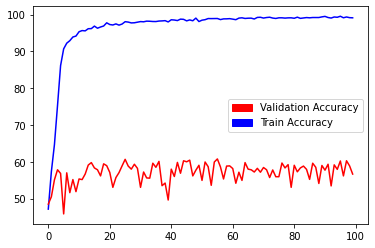

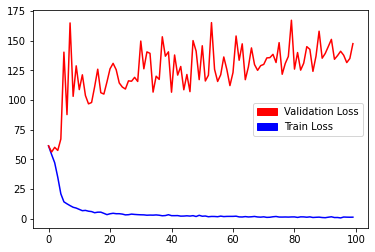

<All keys matched successfully>

In [15]:
# Learning
import copy

acc_t = []
acc_v = []

loss_train = []
loss_val = []

print('***START EPOCH***')
best_acc = 0.0  # beset accuracy 초기화
best_model_wts = copy.deepcopy(model.state_dict()) 

for epoch in range(100):
    print('# Epoch : {} /100'.format(epoch))
    train_img, pred_t, truth_t, accuracy_t, loss_t = run_train(model)
    valid_img, pred_v, truth_v, accuracy_v, loss_v = run_valid(model)
    #if epoch%4 == 0:
    print('Train Accuracy : {}'.format(accuracy_t))
    print('Validation Accuracy : {}'.format(accuracy_v))
    print('Train Loss : {}'.format(loss_t))
    print('Validation Loss : {}'.format(loss_v))
    acc_t.append(accuracy_t)
    acc_v.append(accuracy_v)
    loss_train.append(loss_t)
    loss_val.append(loss_v)

    if accuracy_v>best_acc:  # update best accuracy
      best_acc = accuracy_v
      best_model_wts = copy.deepcopy(model.state_dict())  # 가장 accuracy 높은 model 저장

plt.plot(range(len(acc_t)), acc_t, 'b', range(len(acc_v)), acc_v, 'r')
blue_patch = mpatches.Patch(color='blue', label='Train Accuracy')
red_patch = mpatches.Patch(color='red', label='Validation Accuracy')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

# Loss Graph
plt.plot(range(len(loss_train)), loss_train, 'b', range(len(loss_val)), loss_val, 'r')
blue_patch = mpatches.Patch(color='blue', label='Train Loss')
red_patch = mpatches.Patch(color='red', label='Validation Loss')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

model.load_state_dict(best_model_wts) # validation accuracy, 가장 높은 모델 저장


In [16]:
torch.save(model,'Team')

In [17]:
def evaluate(model, test_loader):
    model.eval()      # 모델 평가 상태로
    test_loss = 0     # test_loss 초기화
    correct = 0       # 맞게 예측한 0 값으로 초기화
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

    with torch.no_grad(): 
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)     # data, target DEVICE에 할당
            output = model(data)                                  # output 계산
            test_loss += criterion(output, target).item()         # loss 계산(총 loss 에 더해주기)
            pred = output.max(1, keepdim=True)[1]                 # 계산된 벡터값 중 가장 큰 값 가지는 class 예측
            correct += pred.eq(target.view_as(pred)).sum().item() # 맞게 예측한 값 세기
   
    test_loss /= len(test_loader.dataset)                         # 평균 loss
    test_accuracy = 100. * correct / len(test_loader.dataset)     # test(validation) 데이터 정확도
    return test_loss, test_accuracy

In [18]:
model=torch.load('Team')
#model.eval()
_, train_acc = evaluate(model, train_loader)
_, val_acc = evaluate(model, valid_loader)

# prit saved model's train and validation accuracy
print('Train Accuracy: {:.4f}'.format(train_acc))
print('Validation Accuracy: {:.4f}'.format(val_acc))

Train Accuracy: 98.6528
Validation Accuracy: 60.7778


In [19]:
from sklearn.metrics import classification_report
def prediction(model, data_loader):
    model.eval()
    predlist=torch.zeros(0,dtype=torch.long, device='cpu')
    lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
    
    with torch.no_grad():
      for i, (data, label) in enumerate(data_loader):
        data = data.to(DEVICE)        # 데이터 DEVICE에 할당
        label = label.to(DEVICE)      # 라벨 값 DEVICE에 할당
        outputs = model(data)         # 예측
        _, preds = torch.max(outputs, 1)  # 가장 높은 확률 가지는 class 예측

        # Batch 단위 예측값 append 하기
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,label.view(-1).cpu()])
        
    # Classification Report
    print(classification_report(lbllist.numpy(), predlist.numpy())) # 클래스별 accuracy, recall, f1-score 
    return

In [20]:
prediction(model, valid_loader)

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       600
           1       0.70      0.54      0.61       600
           2       0.59      0.74      0.66       600

    accuracy                           0.61      1800
   macro avg       0.62      0.61      0.61      1800
weighted avg       0.62      0.61      0.61      1800

